<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/Linear%20Regression/Linear_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: Linear Regression on a simple 2D dataset using PyTorch<br>
Author: Szymon Manduk<br>
Created: 29 Jan 2022<br>
Last modyfication: 29 Jan 2022<br>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# uncomment if in need of the same results from trial to trial
# torch.manual_seed(1)

In [3]:
# generate some random data 
X = torch.randn(100) * 10

# the bigger the noice is the more the data is spread. Values from 2 to 5 are fairly reasonable
noice = 3

# generate output with some gausian noice
Y = X + torch.randn(100) * noice 

In [4]:
# Create Linear Regression model using torch Linear
from torch.nn.modules.linear import Linear

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = Linear(input_size, output_size)    
  def forward(self, x):
    return self.linear(x)

0.39494574069976807 -0.27802467346191406


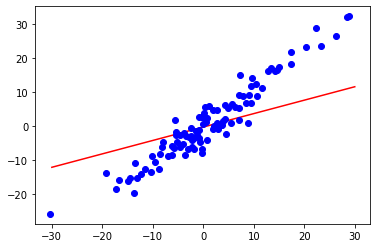

In [5]:
# Let's test this simple model looking at the initial output
test_model = LR(1,1)

# get initial parameters, convert to scalars, print
[w, b] = test_model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

# plot initial model
x1 = np.array([-30, 30])
y1 = w1*x1 + b1
plt.plot(x1, y1, 'r')
plt.plot(X, Y, 'bo')

In [6]:
# setting hyperparameters
in_dimention = 1
out_dimention = 1
learning_rate = 0.00001
epochs = 1000

In [7]:
# create model
model = LR(in_dimention, out_dimention)

# curious what are initial parameters
[w, b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

-0.2112671136856079 -0.9299386739730835


In [8]:
# create the loss function and the optimizer
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [9]:
# test if we can retrieve training data properly
i = 0
for x, y in torch.stack((X, Y), dim=1):
  x = x.view([1]) 
  y = y.view([1]) 
  print(f'x= {x.item()}, y={y.item()}')
  i += 1
  if i > 5:
    break

x= 20.24632453918457, y=23.242258071899414
x= -0.6600362658500671, y=-4.629915714263916
x= -3.918630599975586, y=-2.058356523513794
x= 7.035638809204102, y=9.137423515319824
x= 3.5753836631774902, y=0.39067649841308594
x= 0.7768567800521851, y=-4.081860065460205


In [10]:
# we train the model for # of epochs, printing results every 100 epochs
for epoch in range(epochs):
  for x, y in torch.stack((X, Y), dim=1):
    x = x.view([1])
    y = y.view([1])

    y_pred = model.forward(x)

    loss = criterion(y_pred, y)

   
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  if epoch%100==0:
    print(f'Epoch={epoch}, loss={loss}')

Epoch=0, loss=150.38543701171875
Epoch=100, loss=6.488505840301514
Epoch=200, loss=5.930007457733154
Epoch=300, loss=5.49065637588501
Epoch=400, loss=5.1429314613342285
Epoch=500, loss=4.866185188293457
Epoch=600, loss=4.644845962524414
Epoch=700, loss=4.467178821563721
Epoch=800, loss=4.3240156173706055
Epoch=900, loss=4.2083563804626465


In [11]:
# retrieve trained parameters from the model (w and b)
[w, b] = model.parameters()
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

1.0459601879119873 -0.19903354346752167


<function matplotlib.pyplot.show>

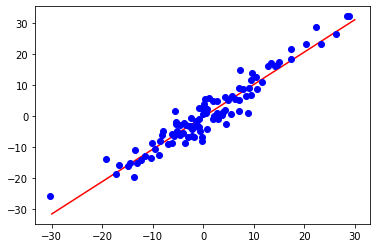

In [12]:
# draw a line and the training set to check results
x1 = np.array([-30, 30])
y1 = w1*x1 + b1
plt.plot(x1, y1, 'r')
plt.plot(X, Y, 'bo')
plt.show